## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
#Normalizing the font sizes for the plots throughout the notebook
small = 14
meduim = 16
large = 18
plt.rc('font', size=small)          # controls default text sizes
plt.rc('axes', titlesize=small)     # fontsize of the axes title
plt.rc('axes', labelsize=meduim)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
plt.rc('legend', fontsize=small)    # legend fontsize
plt.rc('figure', titlesize=large)   # fontsize of the figure title
color = 'white' 
#Change the color of text in the plot according to your prefrence, 
#I had a dark theme on my notebook, so I set it to 'white'

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0, 20)
a = -1
b = 2
Y = a*X+b
X = X.reshape(X.shape[0], 1)
Y = Y.reshape(Y.shape[0], 1)

In [4]:
print(f'X = \n{X.T}, \nY = \n{Y.T}')

X = 
[[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
   2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
   4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
   7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
   9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
  12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
  14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
  17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
  19.59183673 20.        ]], 
Y = 
[[  2.           1.59183673   1.18367347   0.7755102    0.36734694
   -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
   -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
   -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
   -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
   -8.20408163  -8.6122449   -9.02

#### Plot your data points. 

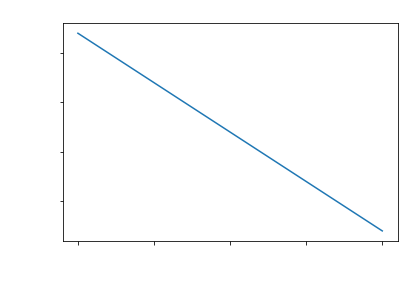

In [5]:
plt.plot(X, Y)
plt.title('X-Y Plot', color=color)
plt.xlabel('X', color=color)
plt.ylabel('Y', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line fit of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [6]:
def GD(X, Y, alpha, iters):
    no_thetas = X.shape[-1] + 1
    m = X.shape[0]
    thetas = np.zeros(no_thetas).reshape(no_thetas, 1)
    X = np.concatenate((np.ones(X.shape[0]).reshape(X.shape[0],1), X), axis = 1)

    print(f'x = {X.shape}, y = {Y.shape}, thetas = {thetas.shape}, m = {m}')
    h = np.dot(X, thetas)
    z = h - Y
    j = ((1/(2*m))*(z**2)).sum()
    j_prime = (1/m)*(np.dot(X.T, z))
    thetas = thetas - alpha*j_prime
    
    counter = 0
    #list_h = []
    list_j= []
    list_thetas= []

    while(counter < iters):
        #Step 2 
        h = np.dot(X, thetas)    
        #list_h.append(h)
        #Step 3
        z = h - Y
        j = ((1/(2*m))*(z**2)).sum()
        list_j.append(j)
        #Step 4
        j_prime = (1/m)*(np.dot(X.T, z))
        #Step 5/
        thetas = thetas - alpha*j_prime

        list_thetas.append(thetas)

        counter += 1

    print(f"theta_0 = {thetas[0]} \ntheta_1 = {thetas[1]}\nCost Function = {j}\nNo. of iterations = {counter}")
    return list_thetas, list_j, thetas    

In [7]:
def SVGD(X, Y, alpha, iters):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    m = len(x_points)
    
    counter = 0
    list_j=[]
    list_h=[]
    list_theta_0=[]
    list_theta_1=[]
    list_thetas=[]

    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        list_h.append(h_theta)
        #Step 3
        j = (1/(2*m))*(((h_theta - y_points)**2).sum())
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (1/m)*((h_theta - y_points).sum())
        j_prime_theta_1 = (1/m)*(((h_theta - y_points)*x_points).sum())
        #Step 5
        theta_0 = theta_0 - (alpha*(j_prime_theta_0))
        theta_1 = theta_1 - (alpha*(j_prime_theta_1))

        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)
        
        list_theta_0.append(theta_0)
        list_theta_1.append(theta_1)

        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \nNumber of iterations = {counter}")
    return list_thetas, list_j, list_h, thetas

In [8]:
alpha = 1e-2
iters = 1000
l_thetas_BGD, l_j_BGD, thet_BGD = GD(X, Y, alpha, iters)
y_predicted_BGD = thet_BGD[0] + (thet_BGD[1]*X)
l_thetas_BGD = np.array(l_thetas_BGD)

x = (50, 2), y = (50, 1), thetas = (2, 1), m = 50
theta_0 = [1.84170837] 
theta_1 = [-0.98822565]
Cost Function = 0.0032435700004490205
No. of iterations = 1000


In [9]:
r2score_BGD = r2_score(Y, y_predicted_BGD)
print(f'r2score = {r2score_BGD}')

r2score = 0.9998139744542047


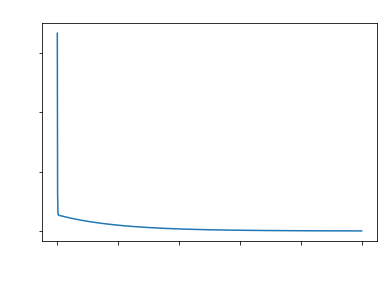

In [10]:
plt.plot(range(len(l_j_BGD)), l_j_BGD)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

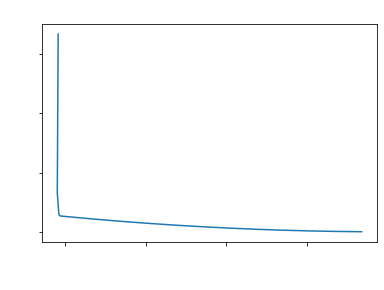

In [11]:
plt.plot(l_thetas_BGD[:, 0], l_j_BGD)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

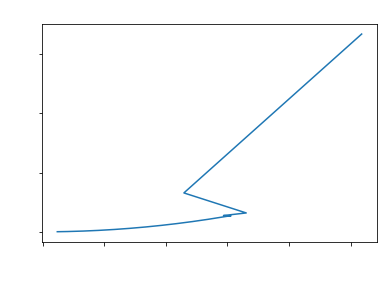

In [12]:
plt.plot(l_thetas_BGD[:, 1], l_j_BGD)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

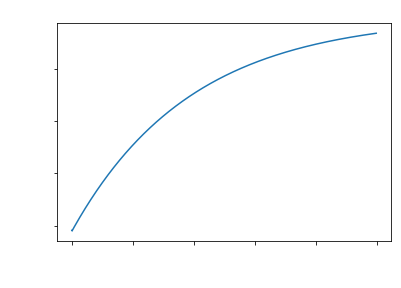

In [13]:
plt.plot(range(l_thetas_BGD.shape[0]), l_thetas_BGD[:, 0])
plt.title('Theta_0-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_0', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

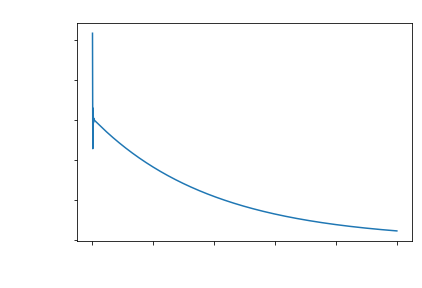

In [14]:
plt.plot(range(l_thetas_BGD.shape[0]), l_thetas_BGD[:, 1])
plt.title('Theta_1-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_1', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

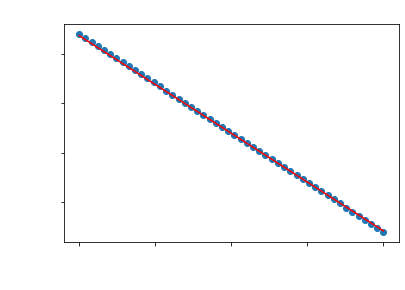

In [15]:
plt.scatter(X, Y)
plt.plot(X, y_predicted_BGD, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

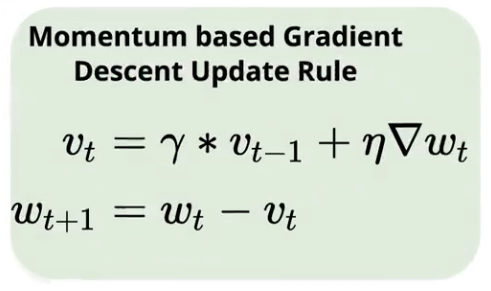

#### γ takes values between 0 and 1.
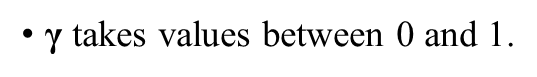

In [26]:
def MGD(X, Y, alpha, gamma, iters):
    no_thetas = X.shape[-1] + 1
    m = X.shape[0]
    thetas = np.zeros(no_thetas).reshape(no_thetas, 1)
    V = np.zeros(no_thetas).reshape(no_thetas, 1)
    X = np.concatenate((np.ones(X.shape[0]).reshape(X.shape[0],1), X), axis = 1)

    print(f'x = {X.shape}, y = {Y.shape}, thetas = {thetas.shape}, m = {m}, V = {V.shape}')
    h = np.dot(X, thetas)
    z = h - Y
    j = ((1/(2*m))*(z**2)).sum()
    j_prime = (1/m)*(np.dot(X.T, z))
    V = (gamma*V) + alpha*j_prime
    thetas = thetas - V
    
    counter = 0
    list_j= []
    list_thetas= []

    while(counter < iters):
        #Step 2 
        h = np.dot(X, thetas)    
        #Step 3
        z = h - Y
        j = ((1/(2*m))*(z**2)).sum()
        list_j.append(j)
        #Step 4
        j_prime = (1/m)*(np.dot(X.T, z))
        #Step 5/
        V = (gamma*V) + alpha*j_prime
        thetas = thetas - V
        #thetas = thetas - alpha*j_prime

        list_thetas.append(thetas)

        counter += 1

    print(f"theta_0 = {thetas[0]} \ntheta_1 = {thetas[1]}\nCost Function = {j}\nNo. of iterations = {counter}")
    return list_thetas, list_j, thetas

In [32]:
def MSVGD(X, Y, alpha, gamma, iters):
    x_points = X
    y_points = Y
    
    theta_0 = 0
    theta_1 = 0
    v_0 = 0
    v_1 = 1
    m = len(x_points)
    
    counter = 0
    list_j=[]
    list_h=[]
    list_theta_0=[]
    list_theta_1=[]
    list_thetas=[]

    while(counter < iters):
        #Step 2 
        h_theta = theta_0 + (theta_1*x_points)
        list_h.append(h_theta)
        #Step 3
        j = (1/(2*m))*(((h_theta - y_points)**2).sum())
        list_j.append(j)
        #Step 4
        j_prime_theta_0 = (1/m)*((h_theta - y_points).sum())
        j_prime_theta_1 = (1/m)*(((h_theta - y_points)*x_points).sum())
        #Step 5
        v_0 = (gamma*v_0) + (alpha*j_prime_theta_0)
        v_1 = (gamma*v_1) + (alpha*j_prime_theta_1)
                
        theta_0 = theta_0 - v_0
        theta_1 = theta_1 - v_1

        thetas = [theta_0, theta_1]
        list_thetas.append(thetas)
        
        list_theta_0.append(theta_0)
        list_theta_1.append(theta_1)

        counter += 1
    print(f"theta_0 = {theta_0} \ntheta_1 = {theta_1}\nCost Function = {j} \nNumber of iterations = {counter}")
    return list_thetas, list_j, thetas

In [33]:
alpha = 1e-2
gamma = 0.25
iters = 1000
l_thetas_MGD, l_j_MGD, thet_MGD = MGD(X, Y, alpha, gamma, iters)
y_predicted_MGD = thet_MGD[0] + (thet_MGD[1]*X)
l_thetas_MGD = np.array(l_thetas_MGD)

r2score_MGD = r2_score(Y, y_predicted_MGD)
print(f'r2score = {r2score_MGD}')

x = (50, 2), y = (50, 1), thetas = (2, 1), m = 50, V = (2, 1)
theta_0 = [1.93302133] 
theta_1 = [-0.99501787]
Cost Function = 0.0005817383555760474
No. of iterations = 1000
r2score = 0.999966693444796


In [35]:
l_thetas_MSVGD, l_j_MSVGD, thetas_MSVGD = MSVGD(X, Y, 1e-2, 0.25, 1000)
y_predicted_MSVGD = thetas_MSVGD[0] + (thetas_MSVGD[1]*X)

r2score_MSVGD = r2_score(Y, y_predicted_MSVGD)
print(f'r2score_MSVGD = {r2score_MSVGD}')

theta_0 = 1.9335985253512926 
theta_1 = -0.9950608001673167
Cost Function = 0.0005717551953715726 
Number of iterations = 1000
r2score_MSVGD = 0.999967265015629


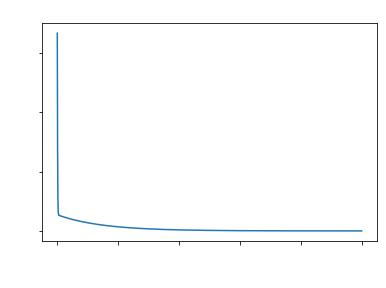

In [18]:
plt.plot(range(len(l_j_MGD)), l_j_MGD)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

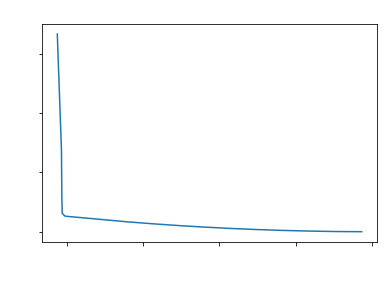

In [19]:
plt.plot(l_thetas_MGD[:, 0], l_j_MGD)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

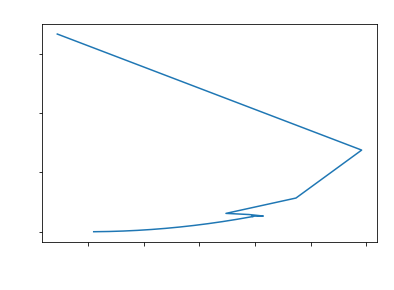

In [20]:
plt.plot(l_thetas_MGD[:, 1], l_j_MGD)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

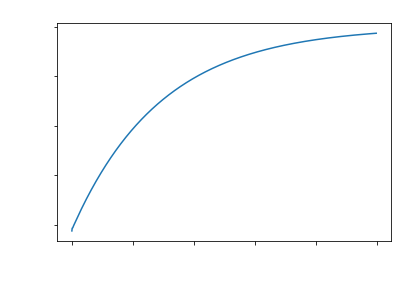

In [21]:
plt.plot(range(l_thetas_MGD.shape[0]), l_thetas_MGD[:, 0])
plt.title('Theta_0-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_0', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

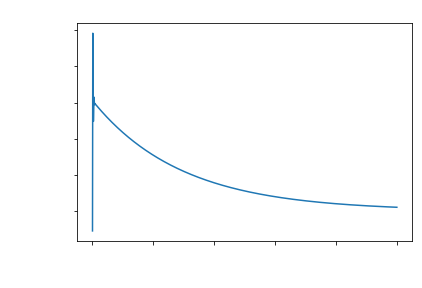

In [22]:
plt.plot(range(l_thetas_MGD.shape[0]), l_thetas_MGD[:, 1])
plt.title('Theta_1-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_1', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

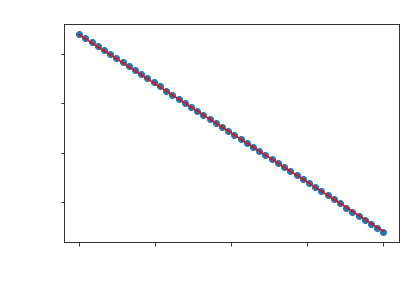

In [23]:
plt.scatter(X, Y)
plt.plot(X, y_predicted_MGD, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

In [24]:
l_thetas0_MGD = l_thetas_MGD[:,0].flatten()
l_thetas1_MGD = l_thetas_MGD[:,1].flatten()

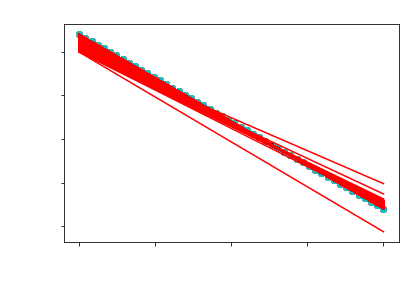

In [25]:
for n in range(len(l_thetas0_MGD)):
    theta0 = l_thetas0_MGD[n]
    theta1 = l_thetas1_MGD[n]
    y_predicted = theta0 + (theta1*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

### Update your Batch GD for one variable  implementation to be NAG and check your results

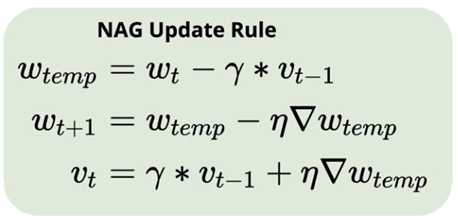

In [26]:
def NAG(X, Y, alpha, gamma, iters):
    no_thetas = X.shape[-1] + 1
    m = X.shape[0]
    thetas = np.zeros(no_thetas).reshape(no_thetas, 1)
    V = np.zeros(no_thetas).reshape(no_thetas, 1)
    X = np.concatenate((np.ones(X.shape[0]).reshape(X.shape[0],1), X), axis = 1)

    print(f'x = {X.shape}, y = {Y.shape}, thetas = {thetas.shape}, m = {m}, V = {V.shape}')
    h = np.dot(X, thetas)
    z = h - Y
    j = ((1/(2*m))*(z**2)).sum()
    j_prime = (1/m)*(np.dot(X.T, z))
    thetas_temp = thetas - (gamma*V)
    h_temp = np.dot(X, thetas_temp)
    z_temp = h_temp - Y
    j_temp = ((1/(2*m))*(z_temp**2)).sum()
    j_prime_temp = (1/m)*(np.dot(X.T, z_temp))
    thetas = thetas_temp - (alpha*j_prime_temp)
    V = (gamma*V) + alpha*j_prime
    #thetas = thetas - V
    
    counter = 0
    list_j= []
    list_thetas= []

    while(counter < iters):
        #Step 2 
        h = np.dot(X, thetas)    
        #Step 3
        z = h - Y
        j = ((1/(2*m))*(z**2)).sum()
        list_j.append(j)
        #Step 4
        j_prime = (1/m)*(np.dot(X.T, z))
        #Step 5/
        thetas_temp = thetas - (gamma*V)
        h_temp = np.dot(X, thetas_temp)
        z_temp = h_temp - Y
        j_temp = ((1/(2*m))*(z_temp**2)).sum()
        j_prime_temp = (1/m)*(np.dot(X.T, z_temp))
        thetas = thetas_temp - (alpha*j_prime_temp)
        V = (gamma*V) + alpha*j_prime
        #V = (gamma*V) + alpha*j_prime
        #thetas = thetas - V
        #thetas = thetas - alpha*j_prime

        list_thetas.append(thetas)

        counter += 1

    print(f"theta_0 = {thetas[0]} \ntheta_1 = {thetas[1]}\nCost Function = {j}\nNo. of iterations = {counter}")
    return list_thetas, list_j, thetas    

In [27]:
alpha = 1e-2
iters = 1000
l_thetas_NAG, l_j_NAG, thet_NAG = NAG(X, Y, alpha, gamma, iters)
y_predicted_NAG = thet_NAG[0] + (thet_NAG[1]*X)
l_thetas_NAG = np.array(l_thetas_NAG)

x = (50, 2), y = (50, 1), thetas = (2, 1), m = 50, V = (2, 1)
theta_0 = [1.93287337] 
theta_1 = [-0.99500686]
Cost Function = 0.0005843088033549728
No. of iterations = 1000


In [28]:
r2score_NAG = r2_score(Y, y_predicted_NAG)
print(f'r2score = {r2score_NAG}')

r2score = 0.9999665461299821


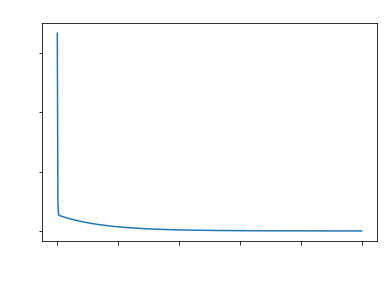

In [29]:
plt.plot(range(len(l_j_NAG)), l_j_NAG)
plt.title('Loss_Epochs Plot', color=color)
plt.xlabel('Epochs', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

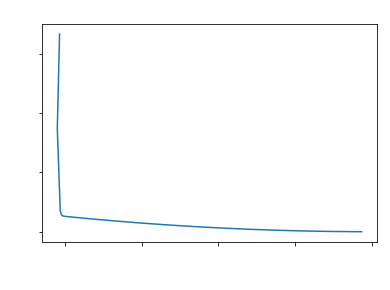

In [30]:
plt.plot(l_thetas_NAG[:, 0], l_j_NAG)
plt.title('Theta_0-Loss Plot', color=color)
plt.xlabel('Theta_0', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

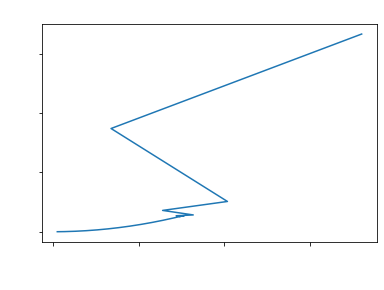

In [31]:
plt.plot(l_thetas_NAG[:, 1], l_j_NAG)
plt.title('Theta_1-Loss Plot', color=color)
plt.xlabel('Theta_1', color=color)
plt.ylabel('Loss', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

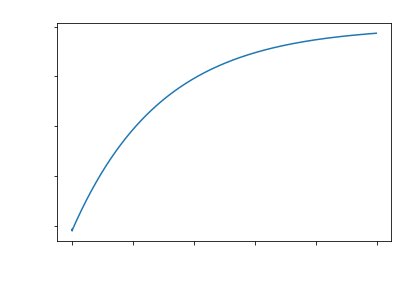

In [32]:
plt.plot(range(l_thetas_NAG.shape[0]), l_thetas_NAG[:, 0])
plt.title('Theta_0-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_0', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

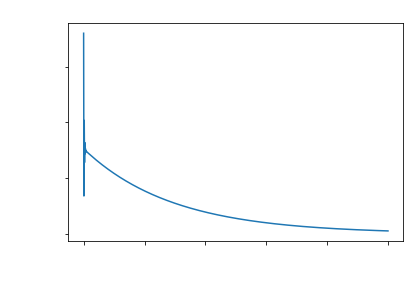

In [33]:
plt.plot(range(l_thetas_NAG.shape[0]), l_thetas_NAG[:, 1])
plt.title('Theta_1-Iterations Plot', color=color)
plt.xlabel('Iterations', color=color)
plt.ylabel('Theta_1', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

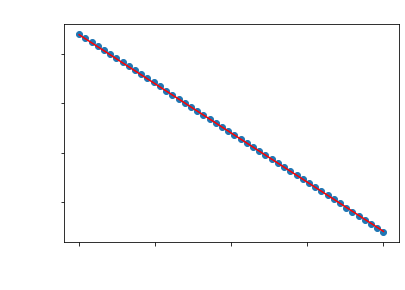

In [34]:
plt.scatter(X, Y)
plt.plot(X, y_predicted_NAG, color='red')
plt.title('Plot-Scatter Plot', color=color)
plt.xlabel('X_Points', color=color)
plt.ylabel('Y_Points', color=color)
plt.xticks(color=color)
plt.yticks(color=color);

In [35]:
l_thetas0_NAG = l_thetas_NAG[:,0].flatten()
l_thetas1_NAG = l_thetas_NAG[:,1].flatten()

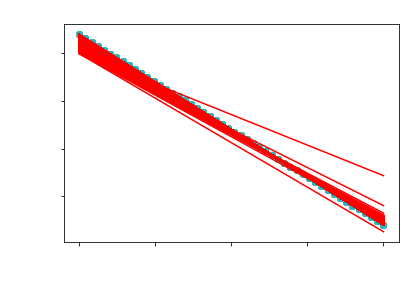

In [36]:
for n in range(len(l_thetas0_NAG)):
    theta0 = l_thetas0_NAG[n]
    theta1 = l_thetas1_NAG[n]
    y_predicted = theta0 + (theta1*X)
    plt.scatter(X, Y)
    plt.plot(X, y_predicted, color='red')
    plt.title('Plot-Scatter Plot', color=color)
    plt.xlabel('X_Points', color=color)
    plt.ylabel('Y_Points', color=color)
    plt.xticks(color=color)
    plt.yticks(color=color);

## Congratulations 
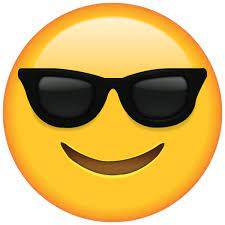